In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import argparse
import yaml
import os
import sys
from pathlib import Path
import numpy as np
import torch
# Handle both direct execution and module execution     

from src.countsdiff.training.trainer import CountsdiffTrainer
from src.countsdiff.generation.generator import CountsdiffGenerator
from src.countsdiff.generation import sampling
from src.countsdiff.config.config import Config


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## Recommended run_id's:
### CelebA: 
- 'ICLR-10' (large model)
- 'ICLR-9' (small model) 
- 'ICLR-7' (small model with Blackout Diffusion noise schedule)
### CIFAR-10:
- 'ICLR-16' (large model)
- 'ICLR-21' (large model, blackout diffusion noise schedule + continuous training + guidance)
- 'ICLR-20' (large model, vanilla blackout diffusion)
- 'ICLR-8' (small model; generated samples in the paper)

In [8]:
run_id = 'ICLR-16'
num_samples = 100
n_steps = 1000
device = 'cuda'
config = Config.load_from_neptune(run_id, project_name="countsdiff-iclr/ICLR")
# config["model"]["block_out_channels"] = [128, 256, 256, 256]
# config["model"]["class_embed_type"] = 'identity'
# config["model"]["num_classes"] = 10
if config['model']['model_type'] != '2d':
    raise ValueError("Non 2d data not supported yet")
generator = CountsdiffGenerator(run_id=run_id, legacy_model=False)
np.random.seed(42)
torch.manual_seed(42)

Connecting to Neptune run countsdiff-iclr/ICLR/ICLR-16
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/countsdiff-iclr/ICLR/e/ICLR-16


Successfully connected to Neptune
Loaded configuration from Neptune run countsdiff-iclr/ICLR/ICLR-16
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/countsdiff-iclr/ICLR/e/ICLR-16/metadata
Connecting to Neptune run countsdiff-iclr/ICLR/ICLR-16
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/countsdiff-iclr/ICLR/e/ICLR-16
Successfully connected to Neptune
Loaded configuration from Neptune run countsdiff-iclr/ICLR/ICLR-16
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/countsdiff-iclr/ICLR/e/ICLR-16/metadata
No data_path specified in data configuration
Trainer initialized on device cuda
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/countsdiff-iclr/ICLR

In [4]:
space = torch.from_numpy(np.linspace(0, 1, 1000)).float().to(device)
p_s = generator.trainer.cosine_p_scheduler(space)
p_t = p_s[:-1]
p_s = p_s[1:]
sigma_maxes = sampling._sigma_rescaled(p_t, p_s, 0.005)

In [5]:
labels = torch.arange(10).unsqueeze(0).expand(num_samples//10, 10).flatten().to(device)

In [ ]:

samples = generator.generate_samples(
    num_samples=num_samples,
    n_steps=n_steps,
    device=device,
    sigma_method='rescaled', #attrition schedule
    sigma_kwargs={'eta_rescale': 0.005}, #attrition schedule parameter
    verbose=True,
    labels=labels,
    guidance_scale=2.0
)


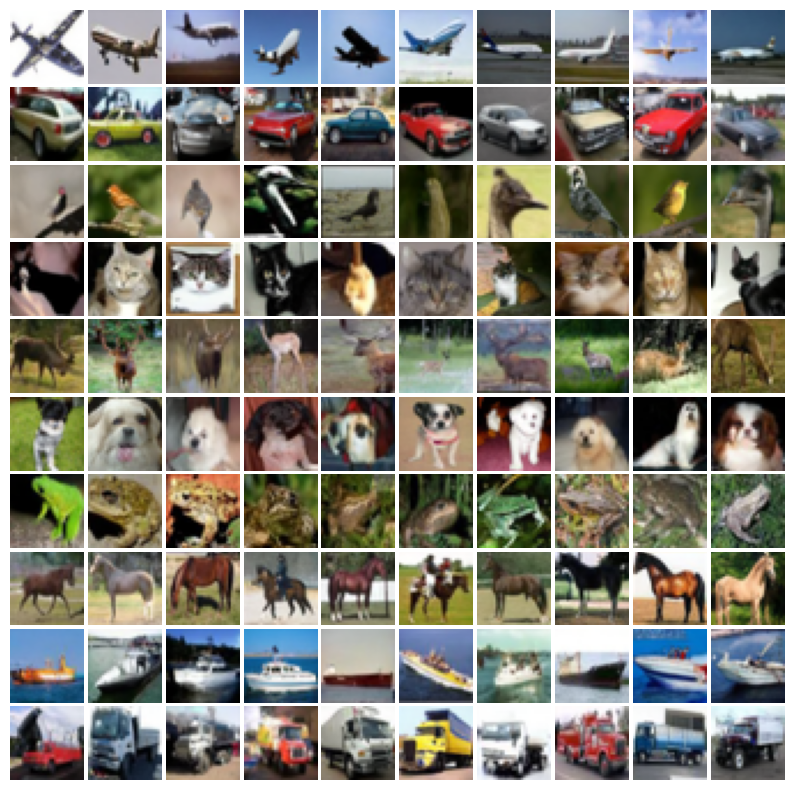

In [11]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(100):
    row = i % 10
    col = i // 10
    axes[row, col].imshow(samples[i].transpose(1, 2, 0).astype(int))
    axes[row, col].axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)  # smaller numbers = less space
plt.show()

